# Image and Image Filtering

## Digital Image

A digital image is an approximate result of a real-life scene. It is also a discrete version of a function

_Note:_
- *Resolution*: Number of pixels of an image and its representation are one of the following
    - w x h (ex: 1920x1080)
    - X Megapixel (ex: 8 Megapixel = 3264x2448)
    - 4K, etc. (4K = 3840x2160)

## Image Filtering

- Filter (or 'mask', 'kernel'): a matrix of numbers (weights) represent an operator on an image
- Filtering: Apply the filter (operator) onto an image
- Goal:
    - Extract information from an image
    - Process an image (blurring, sharpening, etc.)

## How to apply a filter to an image

*Let:*
- F: original image
- G: output image
- H: kernel (with the size of 2k+1)

### Method 1. Cross-correlation

$$G = H \otimes F$$
$$G[i,j] = \sum_{u=-k}^{k}\sum_{v=-k}^{k} H[u,v]F[i+u,j+v]$$

### Method 2. Convolution

$$G = H \ast F$$
$$G[i,j] = \sum_{u=-k}^{k} \sum_{v=-k}^{k} H[u,v] F[i-u,j-v]$$

### Implementation

**Library**

In [37]:
import cv2
from cv2 import COLOR_BGR2RGB
from cv2 import COLOR_BGR2GRAY
import numpy as np
from matplotlib import pyplot as plt

**Load image**

In [32]:
image_file = 'images/jakiichu.jpg'

F_bgr  = cv2.imread(image_file)
F_gray = cv2.cvtColor(F_bgr, COLOR_BGR2GRAY)
F_rgb  = cv2.cvtColor(F_bgr, COLOR_BGR2RGB)

*Gray image*

[]

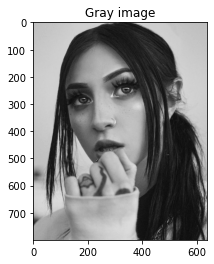

In [33]:
plt.imshow(F_gray, cmap='gray')
plt.title('Gray image')
plt.plot()

*Color image*

[]

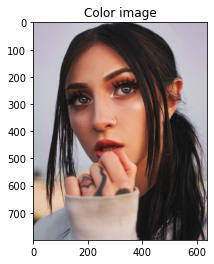

In [35]:
plt.imshow(F_rgb)
plt.title('Color image')
plt.plot()

#### Cross-correlation operator

In [68]:
# H must be the kernel of size (2k + 1)^2
def cross_correlation(F, H):
    k = H.shape[0] // 2
    F_height, F_width = F.shape
    min_row = k
    min_col = k
    max_row = F_height - k
    max_col = F_width - k
    
    G = np.zeros(F.shape)
    
    for i in range(min_row, max_row):
        for j in range(min_col, max_col):
            G[i, j] = np.sum(F[i-k:i+k+1, j-k:j+k+1] * H)
    
    return G
    

[]

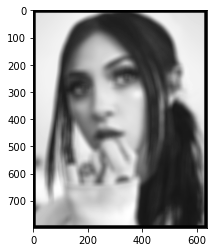

In [67]:
mean_filter = np.full((21, 21), 1/9)


blurred = cross_correlation(F_gray, mean_filter)

plt.imshow(blurred, cmap='gray')
plt.plot()